In [1]:
# Install libraries used for EDA & plotting
!pip install -q pandas matplotlib seaborn plotly


In [2]:
import os
os.makedirs("data", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# If you already uploaded data/sample_sales.csv in your repo and mounted it, this will use it.
if os.path.exists("data/sample_sales.csv"):
    print("Using existing data/sample_sales.csv")
else:
    # create a slightly larger sample dataset to make EDA meaningful
    csv = """order_id,date,category,product,sales,quantity
1,2025-01-01,Electronics,Phone,250,1
2,2025-01-02,Clothing,Shirt,40,2
3,2025-01-03,Electronics,Laptop,1200,1
4,2025-01-04,Home,Vacuum,150,1
5,2025-01-05,Clothing,Jeans,60,1
6,2025-01-06,Grocery,Milk,5,2
7,2025-01-07,Electronics,Headphones,80,1
8,2025-01-08,Toys,Board Game,30,1
9,2025-01-09,Home,Blender,120,1
10,2025-01-10,Clothing,Jacket,100,1
11,2025-02-01,Electronics,Tablet,400,1
12,2025-02-05,Grocery,Bread,3,1
13,2025-02-10,Clothing,Socks,10,5
14,2025-02-15,Toys,Action Figure,25,2
15,2025-02-20,Home,Bed Sheet,70,1
16,2025-03-01,Electronics,Camera,650,1
17,2025-03-05,Clothing,Hat,20,1
18,2025-03-10,Grocery,Cheese,8,1
19,2025-03-15,Toys,RC Car,90,1
20,2025-03-20,Home,Coffee Maker,200,1
21,2025-04-01,Electronics,Monitor,220,1
22,2025-04-05,Clothing,Dress,80,1
23,2025-04-10,Home,Toaster,45,1
24,2025-04-15,Grocery,Eggs,4,12
25,2025-04-20,Toys,Puzzle,15,1
"""
    with open("data/sample_sales.csv","w") as f:
        f.write(csv)
    print("Created data/sample_sales.csv")

# show file
print("Files in data:", os.listdir("data"))


Created data/sample_sales.csv
Files in data: ['sample_sales.csv']


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/sample_sales.csv", parse_dates=["date"])
print("Rows, cols:", df.shape)
display(df.head(8))

# quick schema & nulls
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

# basic stats
display(df.describe(include='all'))


Rows, cols: (25, 6)


,order_id,date,category,product,sales,quantity
0,1,2025-01-01,Electronics,Phone,250,1
1,2,2025-01-02,Clothing,Shirt,40,2
2,3,2025-01-03,Electronics,Laptop,1200,1
3,4,2025-01-04,Home,Vacuum,150,1
4,5,2025-01-05,Clothing,Jeans,60,1
5,6,2025-01-06,Grocery,Milk,5,2
6,7,2025-01-07,Electronics,Headphones,80,1
7,8,2025-01-08,Toys,Board Game,30,1



Data types:
 order_id             int64
date        datetime64[ns]
category            object
product             object
sales                int64
quantity             int64
dtype: object

Missing values per column:
 order_id    0
date        0
category    0
product     0
sales       0
quantity    0
dtype: int64


,order_id,date,category,product,sales,quantity
count,25.000000,25,25,25,25.000000,25.000000
unique,NaN,NaN,5,25,NaN,NaN
top,NaN,NaN,Electronics,Phone,NaN,NaN
freq,NaN,NaN,6,1,NaN,NaN
mean,13.000000,2025-02-13 07:40:48,NaN,NaN,155.000000,1.720000
min,1.000000,2025-01-01 00:00:00,NaN,NaN,3.000000,1.000000
25%,7.000000,2025-01-07 00:00:00,NaN,NaN,20.000000,1.000000
50%,13.000000,2025-02-10 00:00:00,NaN,NaN,70.000000,1.000000
75%,19.000000,2025-03-15 00:00:00,NaN,NaN,150.000000,1.000000
max,25.000000,2025-04-20 00:00:00,NaN,NaN,1200.000000,12.000000


In [4]:
# Aggregations and pivot-like summaries
os.makedirs("outputs", exist_ok=True)

# total sales by category
sales_by_cat = df.groupby("category", as_index=False)["sales"].sum().sort_values("sales", ascending=False)
sales_by_cat.to_csv("outputs/sales_by_category.csv", index=False)
print("Saved outputs/sales_by_category.csv")

# monthly sales (resample)
df_ts = df.set_index("date")
monthly_sales = df_ts["sales"].resample("M").sum().reset_index()
monthly_sales.to_csv("outputs/monthly_sales.csv", index=False)
print("Saved outputs/monthly_sales.csv")

# top products
top_products = df.groupby(["product","category"], as_index=False).agg({"sales":"sum","quantity":"sum"}).sort_values("sales", ascending=False)
top_products.head(10).to_csv("outputs/top_products.csv", index=False)
print("Saved outputs/top_products.csv")


Saved outputs/sales_by_category.csv
Saved outputs/monthly_sales.csv
Saved outputs/top_products.csv


/tmp/ipython-input-1567792797.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts["sales"].resample("M").sum().reset_index()


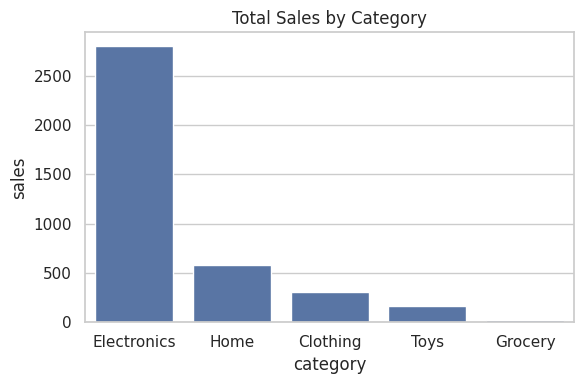

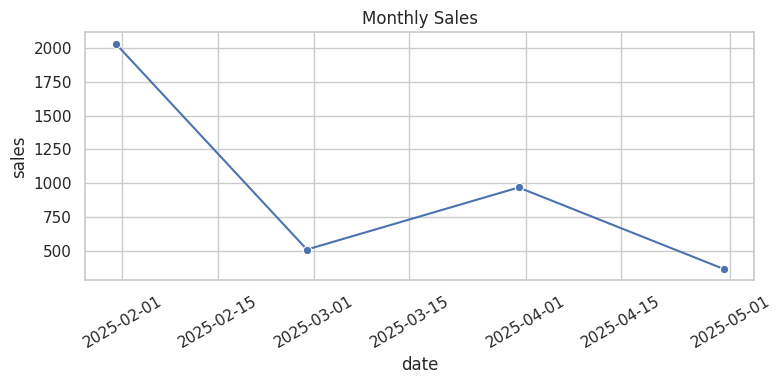

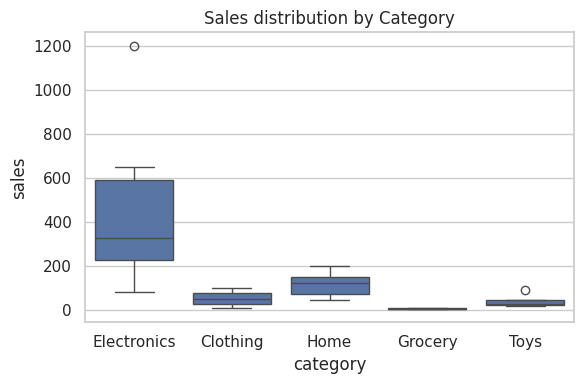

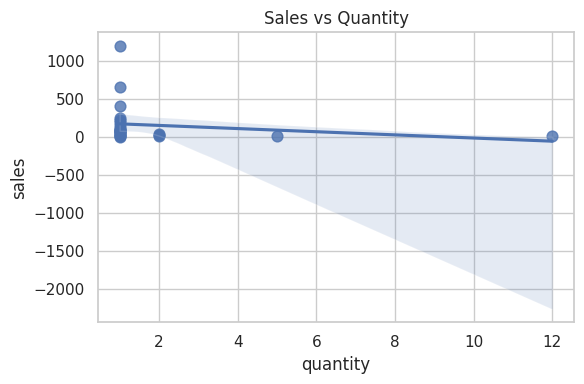

Saved plots in outputs/ (PNG files).
List outputs: ['monthly_sales.png', 'sales_by_category.png', 'monthly_sales.csv', 'top_products.csv', 'sales_by_category.csv', 'sales_vs_quantity.png', 'boxplot_sales_by_category.png']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})

# 1) Bar: sales by category
plt.figure(figsize=(6,4))
ax = sns.barplot(data=sales_by_cat, x="category", y="sales")
ax.set_title("Total Sales by Category")
plt.tight_layout()
plt.savefig("outputs/sales_by_category.png")
plt.show()

# 2) Time-series: monthly sales
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=monthly_sales, x="date", y="sales", marker="o")
ax.set_title("Monthly Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("outputs/monthly_sales.png")
plt.show()

# 3) Boxplot: sales distribution per category
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=df, x="category", y="sales")
ax.set_title("Sales distribution by Category")
plt.tight_layout()
plt.savefig("outputs/boxplot_sales_by_category.png")
plt.show()

# 4) Scatter: sales vs quantity with regplot
plt.figure(figsize=(6,4))
sns.regplot(data=df, x="quantity", y="sales", scatter_kws={"s":60})
plt.title("Sales vs Quantity")
plt.tight_layout()
plt.savefig("outputs/sales_vs_quantity.png")
plt.show()

print("Saved plots in outputs/ (PNG files).")
print("List outputs:", os.listdir("outputs"))


Saved outputs/correlation_matrix.csv


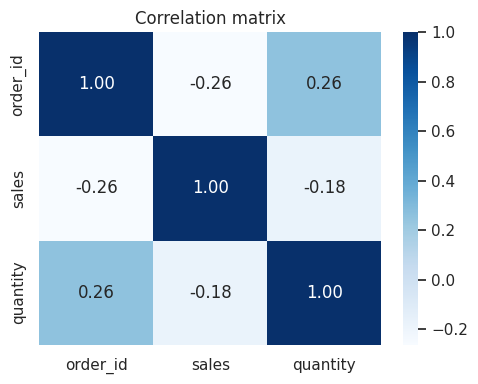

In [6]:
# numeric correlations
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
corr.to_csv("outputs/correlation_matrix.csv")
print("Saved outputs/correlation_matrix.csv")
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation matrix")
plt.tight_layout()
plt.savefig("outputs/correlation_matrix.png")
plt.show()


In [7]:
# Simple HTML report combining CSV snippets and images
from datetime import datetime

report_html = f"""
<html>
<head><title>Task4 EDA Report — Jahnvi Khurana</title></head>
<body>
  <h1>Task 4 — Exploratory Data Analysis</h1>
  <p>Author: Jahnvi Khurana — Unique ID: <b>TASK4-JahnviKhurana-20050430</b></p>
  <p>Generated: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')} UTC</p>

  <h2>Top summaries</h2>
  <h3>Total sales by category</h3>
  {sales_by_cat.to_html(index=False)}

  <h3>Monthly sales</h3>
  {monthly_sales.to_html(index=False)}

  <h2>Visualizations</h2>
  <img src="outputs/sales_by_category.png" width="700"/><br/>
  <img src="outputs/monthly_sales.png" width="700"/><br/>
  <img src="outputs/boxplot_sales_by_category.png" width="700"/><br/>
  <img src="outputs/sales_vs_quantity.png" width="700"/><br/>
  <img src="outputs/correlation_matrix.png" width="500"/><br/>

  <h2>Files saved</h2>
  <ul>
    <li>outputs/sales_by_category.csv</li>
    <li>outputs/monthly_sales.csv</li>
    <li>outputs/top_products.csv</li>
    <li>outputs/correlation_matrix.csv</li>
    <li>plots in outputs/*.png</li>
  </ul>

</body>
</html>
"""

with open("outputs/eda_report.html","w") as f:
    f.write(report_html)

print("Saved outputs/eda_report.html")


Saved outputs/eda_report.html


/tmp/ipython-input-3885273538.py:10: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  <p>Generated: {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')} UTC</p>


In [8]:
# create zip of outputs for download
import shutil
shutil.make_archive("task4_outputs", "zip", "outputs")
print("Created task4_outputs.zip")

# list files
!ls -lh outputs
!ls -lh task4_outputs.zip


Created task4_outputs.zip
total 156K
-rw-r--r-- 1 root root  23K Oct  2 15:48 boxplot_sales_by_category.png
-rw-r--r-- 1 root root  183 Oct  2 15:48 correlation_matrix.csv
-rw-r--r-- 1 root root  25K Oct  2 15:48 correlation_matrix.png
-rw-r--r-- 1 root root 1.9K Oct  2 15:48 eda_report.html
-rw-r--r-- 1 root root   72 Oct  2 15:47 monthly_sales.csv
-rw-r--r-- 1 root root  34K Oct  2 15:48 monthly_sales.png
-rw-r--r-- 1 root root   74 Oct  2 15:47 sales_by_category.csv
-rw-r--r-- 1 root root  20K Oct  2 15:48 sales_by_category.png
-rw-r--r-- 1 root root  25K Oct  2 15:48 sales_vs_quantity.png
-rw-r--r-- 1 root root  258 Oct  2 15:47 top_products.csv
-rw-r--r-- 1 root root 112K Oct  2 15:49 task4_outputs.zip


In [9]:
from google.colab import files
files.download("task4_outputs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files

files.download("data/sample_sales.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>